In [47]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Mon Mar 31 07:46:21 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 560.35.03              Driver Version: 560.35.03      CUDA Version: 12.6     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla P100-PCIE-16GB           Off |   00000000:00:04.0 Off |                    0 |
| N/A   34C    P0             31W /  250W |    3247MiB /  16384MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [48]:
!pip install --upgrade git+https://github.com/huggingface/diarizers.git

  Cloning https://github.com/huggingface/diarizers.git to /tmp/pip-req-build-uxydrf_p
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/diarizers.git /tmp/pip-req-build-uxydrf_p
  Resolved https://github.com/huggingface/diarizers.git to commit f3c8ae500f55ad2b02b719fce1495ea2794ca9fe
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [50]:
# !rm -r /kaggle/working/

In [51]:
import os

def list_files(directory):
    files = []
    for dirpath, dirnames, filenames in os.walk(directory):
        for filename in filenames:
            files.append(os.path.join(dirpath, filename))
    return files

# give audio directory path
directory_path = "/kaggle/input/speaker-diarization/AudioNAnnotations/Audios"
audio_files_list = list_files(directory_path)

In [52]:
audio_files_list

['/kaggle/input/speaker-diarization/AudioNAnnotations/Audios/wc_7.wav',
 '/kaggle/input/speaker-diarization/AudioNAnnotations/Audios/parliament_3.wav',
 '/kaggle/input/speaker-diarization/AudioNAnnotations/Audios/wc_8.wav',
 '/kaggle/input/speaker-diarization/AudioNAnnotations/Audios/debate_1.wav',
 '/kaggle/input/speaker-diarization/AudioNAnnotations/Audios/desh_1.wav',
 '/kaggle/input/speaker-diarization/AudioNAnnotations/Audios/gonotontro_3.wav',
 '/kaggle/input/speaker-diarization/AudioNAnnotations/Audios/debate_6.wav',
 '/kaggle/input/speaker-diarization/AudioNAnnotations/Audios/debate_7.wav',
 '/kaggle/input/speaker-diarization/AudioNAnnotations/Audios/mytv_5.wav',
 '/kaggle/input/speaker-diarization/AudioNAnnotations/Audios/parliament_7.wav',
 '/kaggle/input/speaker-diarization/AudioNAnnotations/Audios/debate_8.wav',
 '/kaggle/input/speaker-diarization/AudioNAnnotations/Audios/desh_3.wav',
 '/kaggle/input/speaker-diarization/AudioNAnnotations/Audios/mytv_3.wav']

In [54]:
import os

def list_files(directory):
    files = []
    for dirpath, dirnames, filenames in os.walk(directory):
        for filename in filenames:
            files.append(os.path.join(dirpath, filename))
    return files

# give annotations directory path
directory_path = "/kaggle/input/speaker-diarization/AudioNAnnotations/Annotations"
annotations_files_list = list_files(directory_path)

In [55]:
annotations_files_list

['/kaggle/input/speaker-diarization/AudioNAnnotations/Annotations/debate_7.rttm',
 '/kaggle/input/speaker-diarization/AudioNAnnotations/Annotations/mytv_5.rttm',
 '/kaggle/input/speaker-diarization/AudioNAnnotations/Annotations/wc_7.rttm',
 '/kaggle/input/speaker-diarization/AudioNAnnotations/Annotations/debate_6.rttm',
 '/kaggle/input/speaker-diarization/AudioNAnnotations/Annotations/gonotontro_3.rttm',
 '/kaggle/input/speaker-diarization/AudioNAnnotations/Annotations/debate_1.rttm',
 '/kaggle/input/speaker-diarization/AudioNAnnotations/Annotations/desh_1.rttm',
 '/kaggle/input/speaker-diarization/AudioNAnnotations/Annotations/debate_8.rttm',
 '/kaggle/input/speaker-diarization/AudioNAnnotations/Annotations/desh_3.rttm',
 '/kaggle/input/speaker-diarization/AudioNAnnotations/Annotations/parliament_7.rttm',
 '/kaggle/input/speaker-diarization/AudioNAnnotations/Annotations/parliament_3.rttm',
 '/kaggle/input/speaker-diarization/AudioNAnnotations/Annotations/wc_8.rttm',
 '/kaggle/input/sp

In [56]:
# annotations_files_list -- removing from the list becasue we have to use those as training data
annotations_files_list.remove('/kaggle/input/speaker-diarization/AudioNAnnotations/Annotations/debate_1.rttm')
annotations_files_list.remove('/kaggle/input/speaker-diarization/AudioNAnnotations/Annotations/desh_1.rttm')

audio_files_list.remove('/kaggle/input/speaker-diarization/AudioNAnnotations/Audios/debate_1.wav')
audio_files_list.remove('/kaggle/input/speaker-diarization/AudioNAnnotations/Audios/desh_1.wav')

In [ ]:


from diarizers import SpeakerDiarizationDataset


annotations_files = {
    "train": annotations_files_list,
    "valid": ["/kaggle/input/speaker-diarization/AudioNAnnotations/Annotations/debate_1.rttm"],
    "test": ["/kaggle/input/speaker-diarization/AudioNAnnotations/Annotations/desh_1.rttm"]

}

audio_files = {
    "train": audio_files_list,
    "valid": ["/kaggle/input/speaker-diarization/AudioNAnnotations/Audios/debate_1.wav"],
    "test": ["/kaggle/input/speaker-diarization/AudioNAnnotations/Audios/desh_1.wav"]
}

In [ ]:
dataset = SpeakerDiarizationDataset(audio_files, annotations_files).construct_dataset()

In [60]:
dataset

DatasetDict({
    train: Dataset({
        features: ['audio', 'timestamps_start', 'timestamps_end', 'speakers'],
        num_rows: 11
    })
    valid: Dataset({
        features: ['audio', 'timestamps_start', 'timestamps_end', 'speakers'],
        num_rows: 1
    })
    test: Dataset({
        features: ['audio', 'timestamps_start', 'timestamps_end', 'speakers'],
        num_rows: 1
    })
})

In [61]:
from IPython.display import Audio, display

example = dataset["train"][0]

In [ ]:
# print(display(Audio(example['audio']['array'], rate=example['audio']['sampling_rate'])))
# #print('Speakers: ', example['speakers'])
# print('timestamps_start: ', example['timestamps_start'])
# print('timestamps_end: ', example['timestamps_end'])

In [62]:
from pyannote.audio import Model

pretrained = Model.from_pretrained(
  "pyannote/segmentation-3.0",
  use_auth_token=True
)

In [63]:
from diarizers import SegmentationModel

model = SegmentationModel.from_pyannote_model(pretrained)

In [64]:
model.config

SegmentationModelConfig {
  "chunk_duration": 10.0,
  "max_speakers_per_chunk": 3,
  "max_speakers_per_frame": 2,
  "min_duration": null,
  "model_type": "pyannet",
  "sample_rate": 16000,
  "transformers_version": "4.44.2",
  "warm_up": [
    0.0,
    0.0
  ],
  "weigh_by_cardinality": false
}

In [65]:
from diarizers import Preprocess

preprocessor = Preprocess(model.config)

/usr/local/lib/python3.10/dist-packages/asteroid_filterbanks/enc_dec.py:202: UserWarning: Input tensor was 2D. Applying the corresponding Decoder to the current output will result in a 3D tensor. This behaviours was introduced to match Conv1D and ConvTranspose1D, please use 3D inputs to avoid it. For example, this can be done with input_tensor.unsqueeze(1).
  warnings.warn(


In [66]:
train_set = dataset['train'].map(
    lambda file: preprocessor(file, random=False, overlap=0.5),
    num_proc=1,
    remove_columns=next(iter(dataset.values())).column_names,
    batched=True,
    batch_size=1
).with_format("torch")

val_set = dataset['valid'].map(
    lambda file: preprocessor(file, random=False, overlap=0.0),
    num_proc=1,
    remove_columns=next(iter(dataset.values())).column_names,
    batched=True,
    batch_size=1
).with_format('torch')

Map:   0%|          | 0/11 [00:00<?, ? examples/s]

Map:   0%|          | 0/1 [00:00<?, ? examples/s]

In [67]:
from IPython.display import Audio, display

example2 = train_set[50]
display(Audio(example2['waveforms'], rate = 16000))

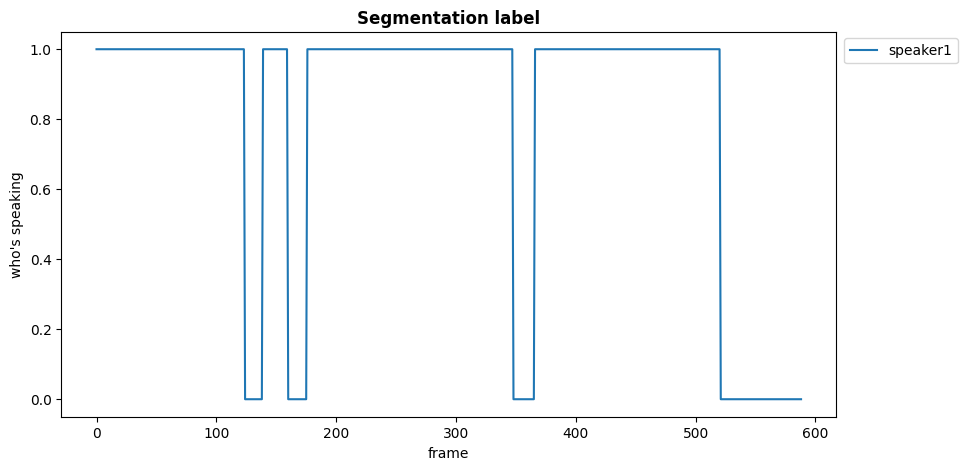

In [68]:
import matplotlib.pyplot as plt

def plot_segmentation_labels(example):

  plt.figure(figsize = (10, 5))
  plt.plot(example2['labels'][:,0], label= 'speaker1')
#   plt.plot(example2['labels'][:,1], label='speaker2')
  plt.legend(bbox_to_anchor=(1.001, 1.001))
  plt.xlabel('frame')
  plt.ylabel("who's speaking")
  plt.title('Segmentation label', fontweight="bold")
  plt.show()

plot_segmentation_labels(example2)

In [69]:
from diarizers import DataCollator

data_collator = DataCollator(max_speakers_per_chunk=model.config.max_speakers_per_chunk)

In [70]:
from diarizers import Metrics

metrics = Metrics(model.specifications)
metrics.metrics

{'der': DiarizationErrorRate(),
 'confusion': SpeakerConfusionRate(),
 'missed_detection': MissedDetectionRate(),
 'false_alarm': FalseAlarmRate()}

In [71]:
from transformers import TrainingArguments

training_args = TrainingArguments(
    output_dir='./bsd-wrong-v1',
    save_strategy="epoch",
    learning_rate=1e-5,
    num_train_epochs=5,
    lr_scheduler_type="cosine",
    per_device_train_batch_size=32,
    per_device_eval_batch_size=32,
    evaluation_strategy="epoch",
    gradient_accumulation_steps=1,
    dataloader_num_workers=2,
    logging_steps=25,
    load_best_model_at_end=True,
    seed=42,
    remove_unused_columns=False,
    push_to_hub=True,
)

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1525: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [72]:
from transformers import Trainer

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_set,
    data_collator=data_collator,
    eval_dataset=val_set,
    compute_metrics=metrics,
)

In [73]:
import wandb
wandb.init(mode="disabled")

In [74]:
first_eval = trainer.evaluate()
first_eval

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


{'eval_loss': 0.25918716192245483,
 'eval_model_preparation_time': 0.0051,
 'eval_der': 0.09747295081615448,
 'eval_false_alarm': 0.07610171288251877,
 'eval_missed_detection': 0.011580012738704681,
 'eval_confusion': 0.009791229851543903,
 'eval_runtime': 3.1955,
 'eval_samples_per_second': 80.737,
 'eval_steps_per_second': 2.816}

In [75]:
train_results = trainer.train()

Could not estimate the number of tokens of the input, floating-point operations will not be computed


Epoch,Training Loss,Validation Loss,Model Preparation Time,Der,False Alarm,Missed Detection,Confusion
1,1.921900,0.246112,0.005100,0.100078,0.079624,0.010819,0.009634
2,1.620400,0.240231,0.005100,0.103318,0.082637,0.010011,0.010670
3,1.490900,0.236777,0.005100,0.104981,0.085171,0.009430,0.010380
4,1.435800,0.235871,0.005100,0.105711,0.086136,0.009297,0.010278
5,1.467900,0.235752,0.005100,0.105805,0.086293,0.009250,0.010262


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os

In [76]:
train_results

TrainOutput(global_step=825, training_loss=1.6298676276929451, metrics={'train_runtime': 181.9142, 'train_samples_per_second': 144.766, 'train_steps_per_second': 4.535, 'total_flos': 0.0, 'train_loss': 1.6298676276929451, 'epoch': 5.0})

In [77]:
# saving the best model in a repository

custom_path = 'synesis-best-bangla-speaker-diarization-model-v2-real-small'
trainer.save_model(output_dir=custom_path)

events.out.tfevents.1743407675.9d011e702384.40.1:   0%|          | 0.00/15.1k [00:00<?, ?B/s]

In [78]:
kwargs = {
    "dataset_tags":'diarizers-community/synband',
    "dataset_args": "config: ban",
    "language": "bab",
    "model_name": "speaker-segmentation-fine-tuned-synband-v2",
    "finetuned_from": "openai/whisper-small",
    "tasks": "speaker-diarization",
    "tags": ['speaker-diarization', 'speaker-segmentation']
}

In [ ]:
trainer.push_to_hub(**kwargs)

In [79]:
model = model.to_pyannote_model()

In [80]:
from diarizers import Test

test = Test(dataset['test'], model, step=2.5)

/usr/local/lib/python3.10/dist-packages/asteroid_filterbanks/enc_dec.py:202: UserWarning: Input tensor was 2D. Applying the corresponding Decoder to the current output will result in a 3D tensor. This behaviours was introduced to match Conv1D and ConvTranspose1D, please use 3D inputs to avoid it. For example, this can be done with input_tensor.unsqueeze(1).
  warnings.warn(


In [81]:
metrics = test.compute_metrics()
metrics

100%|██████████| 1/1 [00:13<00:00, 13.84s/it]


{'der': tensor(0.1857, device='cuda:0'),
 'false_alarm': tensor(0.0698, device='cuda:0'),
 'missed_detection': tensor(0.0791, device='cuda:0'),
 'confusion': tensor(0.0368, device='cuda:0')}

In [82]:
import torch
from pyannote.audio import Pipeline

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

pipeline = Pipeline.from_pretrained("pyannote/speaker-diarization-3.1")
pipeline.to(device)
pipeline._segmentation.model = model.to(device)

In [83]:
example = dataset['test'][0]

print("Number of speaker talking in file: ", len(set(example['speakers'])))

sample = {}
sample["waveform"] = torch.from_numpy(example['audio']["array"]).to(device, dtype=model.dtype).unsqueeze(0)
sample["sample_rate"] = example['audio']['sampling_rate']

Number of speaker talking in file:  6


In [84]:
# perform inference
diarization = pipeline(sample,min_speakers=2)

/usr/local/lib/python3.10/dist-packages/pyannote/audio/models/blocks/pooling.py:104: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ../aten/src/ATen/native/ReduceOps.cpp:1808.)
  std = sequences.std(dim=-1, correction=1)


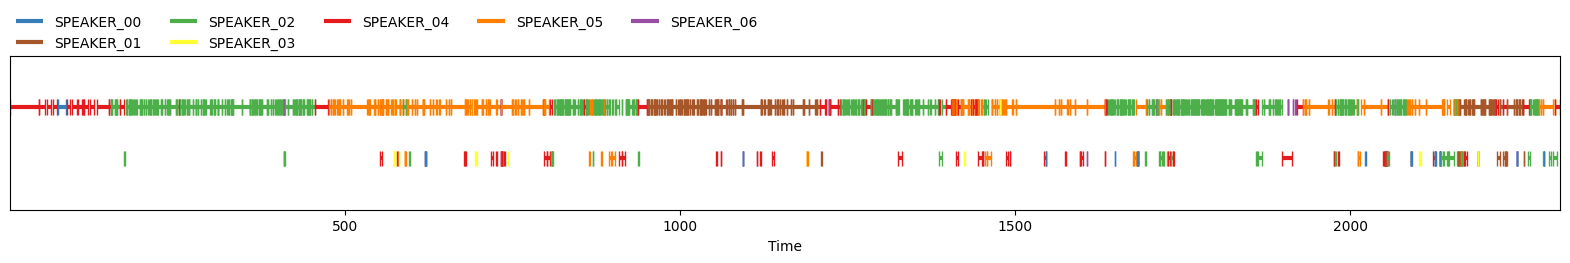

In [85]:
diarization